In [1]:
%pylab inline

import os
import random
import pandas as pd
from scipy.misc import imread

Populating the interactive namespace from numpy and matplotlib


In [2]:
root_dir = os.path.abspath('.')
data_dir = 'C:/Users/HKC05/Downloads'

train = pd.read_csv(os.path.join(data_dir,'train.csv'))
test = pd.read_csv(os.path.join(data_dir,'test.csv'))

In [11]:
i = random.choice(train.index)
img_name = train.ID[i]
img = imread(os.path.join(data_dir,'train',img_name))

print('Age:',train.Class[i])


Age: MIDDLE


C:\Users\HKC05\AppData\Local\conda\conda\envs\minimax\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


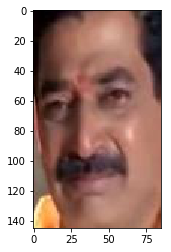

In [12]:
imshow(img)

In [13]:
from scipy.misc import imresize

temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir,'Train',img_name)
    img = imread(img_path)
    img = imresize(img,(32,32))
    img = img.astype('float32')
    temp.append(img)
    
train_x= np.stack(temp)

C:\Users\HKC05\AppData\Local\conda\conda\envs\minimax\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\HKC05\AppData\Local\conda\conda\envs\minimax\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


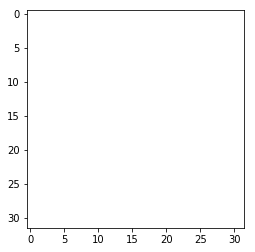

In [14]:
imshow(img)

In [15]:
print(temp[1])

[[[ 46.  29.  34.]
  [ 46.  30.  33.]
  [ 44.  31.  32.]
  ...
  [ 37.  21.  12.]
  [ 35.  22.  13.]
  [ 36.  25.  16.]]

 [[ 41.  26.  29.]
  [ 40.  26.  28.]
  [ 39.  27.  27.]
  ...
  [ 43.  24.  13.]
  [ 38.  23.  13.]
  [ 37.  23.  14.]]

 [[ 35.  24.  24.]
  [ 36.  24.  24.]
  [ 36.  25.  23.]
  ...
  [ 56.  32.  19.]
  [ 44.  25.  12.]
  [ 39.  24.  14.]]

 ...

 [[219. 186. 161.]
  [188. 150. 127.]
  [181. 142. 122.]
  ...
  [ 57.  28.  13.]
  [ 52.  28.  12.]
  [ 53.  27.  14.]]

 [[134.  73.  58.]
  [117.  56.  41.]
  [131.  70.  56.]
  ...
  [ 69.  29.  15.]
  [ 59.  28.  12.]
  [ 57.  28.  14.]]

 [[141.  69.  57.]
  [133.  61.  49.]
  [133.  62.  51.]
  ...
  [116.  50.  41.]
  [101.  42.  31.]
  [ 86.  34.  24.]]]


In [16]:
from scipy.misc import imresize
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir,'Test',img_name)
    img = imread(img_path)
    img = imresize(img,(32,32))
    img = img.astype('float32')
    temp.append(img)
    
test_x= np.stack(temp)

C:\Users\HKC05\AppData\Local\conda\conda\envs\minimax\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\HKC05\AppData\Local\conda\conda\envs\minimax\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


In [17]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [18]:
import keras

Using TensorFlow backend.


In [20]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)


In [21]:
train_y

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [29]:
i1 = (32, 32, 3)
h1 = 500
o1 = 3

e1 = 5 
b1 = 120

from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

model = Sequential([
    InputLayer(input_shape=i1),
    Flatten(),
    Dense(units=h1, activation='relu'),
    Dense(units=o1, activation='softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               1536500   
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x,train_y,batch_size=b1,epochs=e1,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 2s 127us/step - loss: 10.6999 - acc: 0.3362 - val_loss: 10.6415 - val_acc: 0.3398
Epoch 2/5
15924/15924 [==============================] - 2s 109us/step - loss: 10.6999 - acc: 0.3362 - val_loss: 10.6415 - val_acc: 0.3398
Epoch 3/5
15924/15924 [==============================] - 2s 126us/step - loss: 10.6999 - acc: 0.3362 - val_loss: 10.6415 - val_acc: 0.3398
Epoch 4/5
15924/15924 [==============================] - 2s 130us/step - loss: 10.6999 - acc: 0.3362 - val_loss: 10.6415 - val_acc: 0.3398
Epoch 5/5
15924/15924 [==============================] - 2s 109us/step - loss: 10.6999 - acc: 0.3362 - val_loss: 10.6415 - val_acc: 0.3398
